# Statistical Distributions

- def: math functions implemented with python code in the `scipy` library that we can use to model real-world processes

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Uniform Distribution

- discrete `randint`
- continous `uniform`

In [3]:
die_distribution = stats.randint(1,7)
die_distribution

## Working with Distributions

- `.rvs`: random values, e.g. for simulation
- `.pmf` + `.pdf`: =
- `.cdf` + `.ppf`: <=
- `.sf` + `.isf`: >

In [17]:
die_distribution.rvs((5, 2))

array([[5, 5],
       [4, 4],
       [2, 6],
       [1, 3],
       [5, 1]])

In [18]:
# what is the likelihood we roll a 4?
die_distribution.pmf(4)

0.16666666666666666

In [19]:
# what is the probability that we roll a three or less?
die_distribution.cdf(3)

0.5

In [20]:
# what is the likelihood we roll greater than 2?
die_distribution.sf(2)

0.6666666666666667

In [24]:
# there's a 1/6 chance I roll greater than what number?
p = 1/6

die_distribution.isf(p)

5.0

In [27]:
# there's a 50% chance I roll what number or less
halfway_value = die_distribution.ppf(.5) # assigning a discriptive variable
halfway_value

3.0

## Normal Distribution

- continuous random var
- mean, $\mu$, the center
- standard deviation, $\sigma$, the "spread"

In [28]:
coffee_consumption = stats.norm(10, 1)
coffee_consumption

(array([2.000e+00, 3.000e+00, 1.400e+01, 2.500e+01, 4.600e+01, 1.120e+02,
        2.040e+02, 2.880e+02, 5.030e+02, 6.380e+02, 8.530e+02, 9.360e+02,
        1.113e+03, 1.107e+03, 1.057e+03, 8.960e+02, 7.280e+02, 5.830e+02,
        3.480e+02, 2.490e+02, 1.520e+02, 7.200e+01, 3.400e+01, 2.100e+01,
        4.000e+00, 8.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 6.28710509,  6.56658411,  6.84606313,  7.12554215,  7.40502117,
         7.68450019,  7.96397922,  8.24345824,  8.52293726,  8.80241628,
         9.0818953 ,  9.36137432,  9.64085334,  9.92033237, 10.19981139,
        10.47929041, 10.75876943, 11.03824845, 11.31772747, 11.59720649,
        11.87668552, 12.15616454, 12.43564356, 12.71512258, 12.9946016 ,
        13.27408062, 13.55355964, 13.83303867, 14.11251769, 14.39199671,
        14.67147573]),
 <a list of 30 Patch objects>)

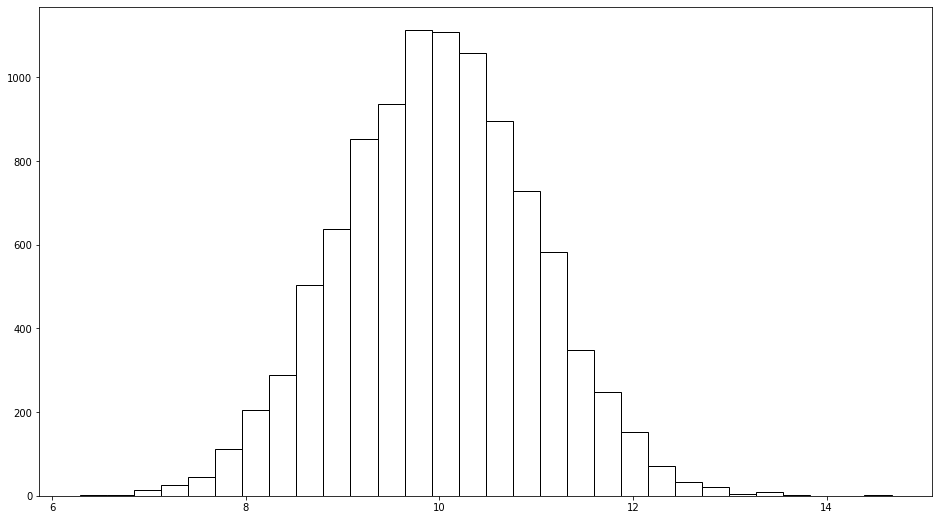

In [34]:
plt.figure(figsize=(16,9))
plt.hist(coffee_consumption.rvs(10_000), bins=30, fc="white", ec="black")

In [37]:
# what's the likelihood we consume less (or equal to) than 8 liters of coffee one day?
coffee_consumption.cdf(8)

0.022750131948179195

In [38]:
# how little coffee do we have to drink to be in the bottom quarter of all days of coffee consumption?
coffee_consumption.ppf(.25)

9.325510249803918

Say the average internet consumption for Spectrum for a neighborhood is 1250 GB +- 100 GB. This is the historical average for the last 3 months.

On Monday we observed 1500 GB of consumption. Assuming internet usage patterns haven't changed, how likely is it we'd see this number due to chance?

In [45]:
internet_usage = stats.norm(1250, 100)
internet_usage.sf(1500)

0.006209665325776132

In [46]:
internet_usage.isf(0.006209665325776132)

1500.0

In [53]:
# How much data usage constitues the top 10% of all days
internet_usage.isf(.10) # Top 10 percent

1378.15515655446

In [48]:
# How much data usage constitues the top 10% of all days
internet_usage.ppf(.90) # 90th percentile

1378.15515655446

(array([3.000e+00, 1.000e+00, 8.000e+00, 1.200e+01, 3.600e+01, 1.140e+02,
        1.960e+02, 3.600e+02, 6.140e+02, 1.024e+03, 1.740e+03, 2.563e+03,
        3.762e+03, 5.008e+03, 6.302e+03, 7.775e+03, 8.767e+03, 9.277e+03,
        9.395e+03, 9.125e+03, 8.195e+03, 7.184e+03, 5.826e+03, 4.330e+03,
        3.081e+03, 2.140e+03, 1.335e+03, 8.320e+02, 4.640e+02, 2.700e+02,
        1.540e+02, 6.300e+01, 2.500e+01, 1.600e+01, 3.000e+00]),
 array([ 812.25321206,  836.22671161,  860.20021115,  884.1737107 ,
         908.14721024,  932.12070979,  956.09420933,  980.06770888,
        1004.04120842, 1028.01470797, 1051.98820751, 1075.96170706,
        1099.9352066 , 1123.90870615, 1147.88220569, 1171.85570524,
        1195.82920478, 1219.80270433, 1243.77620387, 1267.74970342,
        1291.72320297, 1315.69670251, 1339.67020206, 1363.6437016 ,
        1387.61720115, 1411.59070069, 1435.56420024, 1459.53769978,
        1483.51119933, 1507.48469887, 1531.45819842, 1555.43169796,
        1579.40519751

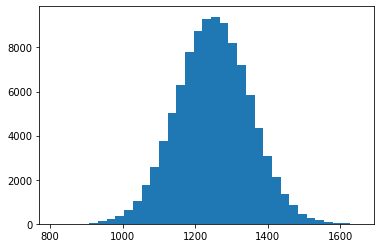

In [52]:
plt.hist(internet_usage.rvs(100_000), bins=35)

## Binomial Distribution

- discrete random var: number of "successes"
- $n$, number of trials
- $p$, probability of success for one trial

In [61]:
# there's a 70 percent chance a food truch shows up.
# what's the likelihood a food truck shows up 2 days out of the week?

# outcome: # of days that a food truck shows up
# n == 5
# p == .70

n = 5
p = .3

stats.binom(n, p).pmf(2)

0.3086999999999999

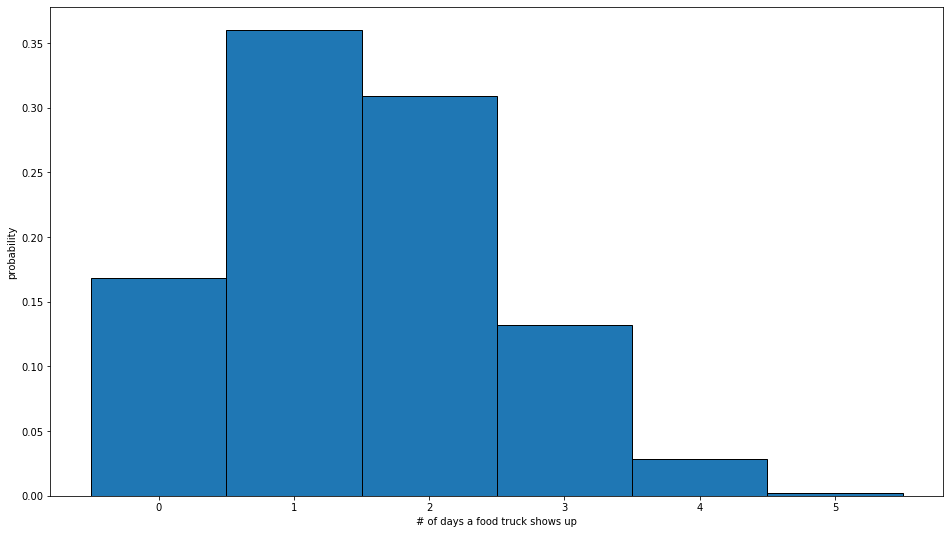

In [62]:
plt.figure(figsize=(16,9))
x = np.arange(0, 6)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y, width=1, ec="black")
plt.xlabel("# of days a food truck shows up")
plt.ylabel("probability")
plt.show()

In [64]:
# What's the likelihood that a food truck shows up 3 or less days out of the week?

n = 5
p = .7

stats.binom(n, p).cdf(3)

0.47178000000000003

In [65]:
# what's the likelihood that a food truck shows up less than 3 days out of the week?
# rephrase in order to use our functions
# likelihood a food truck shows up two or less days out of the week
stats.binom(n, p).cdf(2)

0.16308000000000006

In [66]:
# p(less than 3 days) is equal to
# p(3 or fewer days) - p(3)
stats.binom(n, p).cdf(3) - stats.binom(n, p).pmf(3)

0.1630800000000001

---

Say you go to the grocery store, and there's 80% chance they have toilet paper. If everyone in Curie goes to the store, how likely is it we all can buy toilet paper?

In [78]:
n = 17
p = .8

stats.binom(n, p).pmf(n) # Likelihood that all trials are successes
stats.binom(n, p).sf(n - 1)

0.022517998136852502

Suppose there's a surprise stats quiz this afternoon, and you haven't studied. There's 10 multiple choice questions, each with 4 answers. If you guess at random for each question, what's the likelihood that you pass the quiz?

In [81]:
n = 10
p = .25

stats.binom(n, p).sf(6)

0.003505706787109374

## Poisson Distribution

- discrete random var: number of events
- $\lambda$: avg rate over time

Suppose codeup students ask 3.5 questions per lecture

In [82]:
stats.poisson(3.5).sf(4)

0.2745550466903957

Text(0, 0.5, 'P(X = x)')

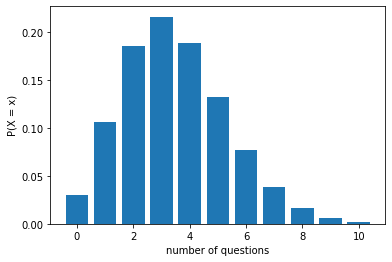

In [90]:
x = np.arange(0, 11)
y = stats.poisson(3.5).pmf(x)

plt.bar(x, y)
plt.xlabel("number of questions")
plt.ylabel("P(X = x)") # the probability that our y label takes on each specific value

In [94]:
# what is the likelihood that two or fewer questions are aseked
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [98]:
# For modeling food turck we used a binomial
# Given P(food truck shows up one day), number of days

# for a poisson distribution, we need an average rate over time
# give number of food trucks per week
# on average 3 food trucks show up per week

# for a given week what's the likelihood that a food truck
# shows up every day -- P(5 or more food trucks show up)
stats.poisson(3).sf(4)

0.18473675547622787

<BarContainer object of 9 artists>

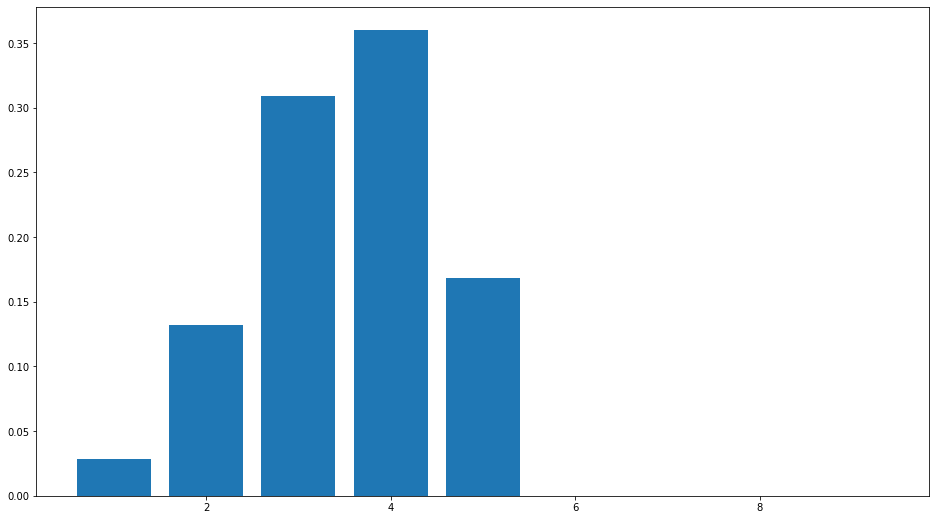

In [100]:
n = 5
p = .7

x = np.arange(1, 10)
y = stats.binom(n, p).pmf(x)

plt.figure(figsize=(16,9))
plt.bar(x, y)